In [58]:
%matplotlib inline
import pandas as pd
import copy
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#import corrplot

# styling
pd.set_option('display.max_columns',150)
plt.style.use('bmh')
from IPython.display import display

import warnings
warnings.filterwarnings("ignore")

# a bit of machine learning
from sklearn.metrics import recall_score, precision_score
from sklearn.cross_validation import KFold, train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV

datos = pd.read_csv('./responses.csv')

#ATENCION. ACA LENVANTE EL ARCHIVO EN MI JUPYTER. VER COMO MEJORAR ESTO. ES DECIR; QUE FUNCIONE EN CUALQUIER PC o en GITHUB


●	Calcular la probabilidad marginal y conjunta, y la correlación entre otras dos variables, por ejemplo consumo de alcohol y tabaquismo.

○	Representar visualmente la probabilidad conjunta entre los valores posibles de las variables elegidas.


### Probabilidades marginales de Alcohol y Tabaquismo

In [59]:
#Probabilidades marginales de Alcohol y Tabaquismo.

#Distribucion de la variable Tabaquismo. 
datos['Smoking'].dropna().value_counts() / len(datos['Smoking'].dropna())


tried smoking     0.429142
never smoked      0.207585
current smoker    0.188623
former smoker     0.174651
Name: Smoking, dtype: float64

Considerando el evento "FUMA" solo a la condicion "current smoker", la probabilidad marginal del evento "FUMA" es:


In [60]:
#creo un Dataframe
df=pd.DataFrame(pd.value_counts(datos['Smoking'].dropna()))

#Obtengo solo los fumadores
fumadores=df[(df.index=='current smoker') ]

#obtengo la cantidad de casos
totalcasos = df['Smoking'].sum()

#obtengo la probabilidad marginal de que una persona sea fumador.

ProbabilidadFumador = fumadores['Smoking'].sum()/totalcasos

print('La probabilidad marginal de que una persona sea fumador es:' , ProbabilidadFumador) 


La probabilidad marginal de que una persona sea fumador es: 0.18862275449101795


In [61]:
#Distribucion de la variable Alcolismo. 
datos['Alcohol'].dropna().value_counts() / len(datos['Smoking'].dropna())


social drinker    0.657685
drink a lot       0.221557
never             0.123752
Name: Alcohol, dtype: float64

Considerando el evento "Alcoholico" solo a la condicion "drink a lot", la probabilidad marginal del evento "es Alcoholico" es:

In [62]:
#creo un Dataframe
df=pd.DataFrame(pd.value_counts(datos['Alcohol'].dropna()))

#Obtengo solo los fumadores
alcoholicos=df[(df.index=='drink a lot') ]

#obtengo la cantidad de casos
totalcasosAlcoholicos = df['Alcohol'].sum()

#obtengo la probabilidad marginal de que una persona sea fumador.

ProbabilidadAlcoholico = alcoholicos['Alcohol'].sum()/totalcasosAlcoholicos

print('La probabilidad marginal de que una persona sea alcoholico es:' , ProbabilidadAlcoholico) 

La probabilidad marginal de que una persona sea alcoholico es: 0.2208955223880597


### La probabilidad Conjunta, es decir, de que una persona sea fumador y alcoholico es la interseccion de los 2 eventos, que al ser independientes, se calcula como p(E∩F)=p(E)×p(F)

In [63]:
ProbabilidadConjunta = ProbabilidadFumador * ProbabilidadAlcoholico

print('La probabilidad conjunta es:' , ProbabilidadConjunta)

La probabilidad conjunta es: 0.041665921887568146


#### Calculamos la Correlacion entre ambas variables

In [64]:
relacionFumadoresAlcoholicos=datos.loc[:, ['Smoking', 'Alcohol']]
print("Correlacion entre Fumar y Tomar")
relacionFumadoresAlcoholicos.corr()

Correlacion entre Fumar y Tomar


""


Para ver la relacion de 2 variables categoricas podemos utilizar tablas de doble entrada (tablas de contingencia)


In [65]:
pd.crosstab(index=datos['Smoking'],
            columns=datos['Alcohol'], margins=True)

Alcohol,drink a lot,never,social drinker,All
Smoking,,,,
current smoker,78,11,99,188
former smoker,55,11,109,175
never smoked,15,61,131,207
tried smoking,72,39,319,430
All,220,122,658,1000


In [66]:
# tabla de contingencia en porcentajes relativos total

tablaCruzada=pd.crosstab(index=datos['Smoking'], columns=datos['Alcohol'],
            margins=True).apply(lambda r: r/len(datos) *100,
                                axis=1)

tablaCruzada

#tablaCruzadaSmoke=pd.crosstab(index=datos['Alcohol'], columns=datos['Smoking'],
 #           margins=True).apply(lambda r: r/len(datos) *100,
 #                               axis=1)
#



Alcohol,drink a lot,never,social drinker,All
Smoking,,,,
current smoker,7.722772,1.089109,9.801980,18.613861
former smoker,5.445545,1.089109,10.792079,17.326733
never smoked,1.485149,6.039604,12.970297,20.495050
tried smoking,7.128713,3.861386,31.584158,42.574257
All,21.782178,12.079208,65.148515,99.009901


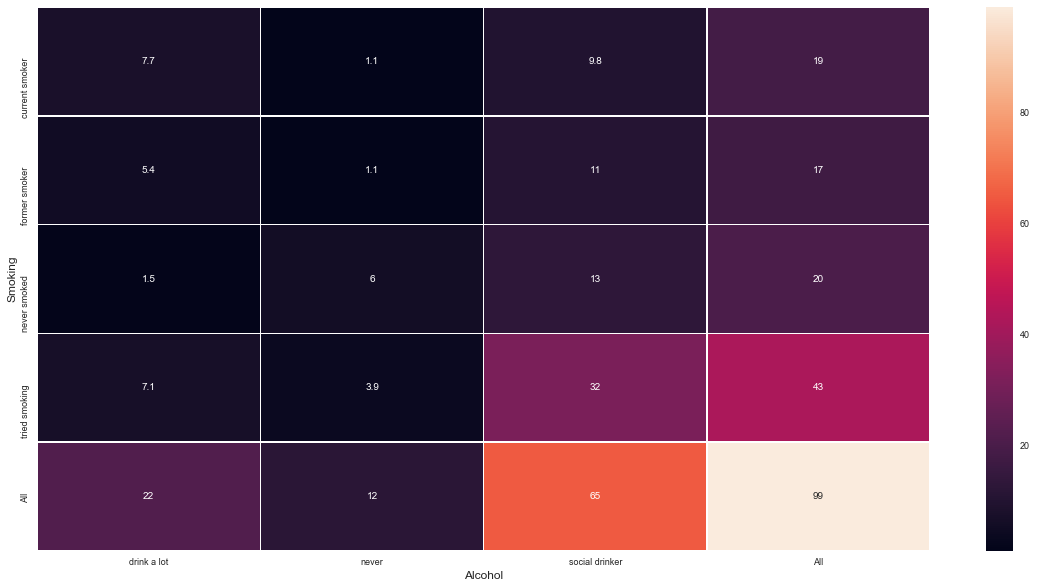

In [67]:
fig, ax = plt.subplots(figsize=(20,10))         # Sample figsize in inches
sns.heatmap(tablaCruzada.iloc[:, 0:100:], annot=True, linewidths=.5, ax=ax)
sns.set(font_scale=0.9)

In [68]:
#Una vez trabajado con los comandos crosstab o pivot, utilizamos sobre el resultado, el comando corr() para poder asi correlacionar variables que eran del tipo categoriacas (ya que corrstab me transformo lo categorico en numerico)

#pivot
#crosstab
tablaCruzada

Alcohol,drink a lot,never,social drinker,All
Smoking,,,,
current smoker,7.722772,1.089109,9.801980,18.613861
former smoker,5.445545,1.089109,10.792079,17.326733
never smoked,1.485149,6.039604,12.970297,20.495050
tried smoking,7.128713,3.861386,31.584158,42.574257
All,21.782178,12.079208,65.148515,99.009901


In [69]:
Parte1= datos[['Alcohol']].reset_index().pivot(columns="Alcohol") >=0
Parte2 =datos[['Smoking']].reset_index().pivot(columns="Smoking") >=0

union = [Parte1, Parte2]
tabla =pd.concat([Parte1, Parte2], axis=1, join='inner')

tabla.corr()

index                                                 \
Alcohol                    NaN drink a lot     never social drinker       NaN   
      Alcohol                                                                   
index NaN             1.000000   -0.037438 -0.026387      -0.096648  0.471112   
      drink a lot    -0.037438    1.000000 -0.198567      -0.727281  0.006516   
      never          -0.026387   -0.198567  1.000000      -0.512605  0.034641   
      social drinker -0.096648   -0.727281 -0.512605       1.000000 -0.098978   
      NaN             0.471112    0.006516  0.034641      -0.098978  1.000000   
      current smoker  0.002328    0.223494 -0.094404      -0.129642 -0.042872   
      former smoker  -0.032291    0.104451 -0.083581      -0.028475 -0.040906   
      never smoked   -0.001036   -0.181622  0.264579      -0.024242 -0.045505   
      tried smoking  -0.060733   -0.108869 -0.084154       0.161626 -0.076936   

                                                                              
Alcohol              current smoker former smoker never smoked tried smoking  
      Alcohol                                                                 
index NaN                  0.002328     -0.032291    -0.001036     -0.060733  
      drink a lot          0.223494      0.104451    -0.181622     -0.108869  
      never               -0.094404     -0.083581     0.264579     -0.084154  
      social drinker      -0.129642     -0.028475    -0.024242      0.161626  
      NaN                 -0.042872     -0.040906    -0.045505     -0.076936  
      current smoker       1.000000     -0.219652    -0.244345     -0.413123  
      former smoker       -0.219652      1.000000    -0.233142     -0.394181  
      never smoked        -0.244345     -0.233142     1.000000     -0.438495  
      tried smoking       -0.413123     -0.394181    -0.438495      1.000000

Esta tabla muestra la correlacion entre las variables Fumar y Tomar Alcohol

●	Responda a la siguientes preguntas: 

¿Qué pasaría con los niveles de tabaquismo si se prohíbe fumar en los bares? 
No se puede sacar este dato dado que no tenemos esa varible. Si podriamos inferirla asumiendo que los tomadores "sociales" son aquellos fumadores que comienzan probando. En dicho caso, si se prohibiera fumar en los bares, habria una probabilidad de que se reduzca un 32 % 

¿Qué pasaría con la cantidad de consumidores de alcohol si disminuye la cantidad de fumadores que consumen alcohol?

La cantidad bajaria un 7,7%

Estas deduciones se realizan tomando la tabla de contingencia, por lo cual, trabajando con probabilidades conjuntas. Otra alternativa es trabajar con probabilidades condicionales
